In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = sns.load_dataset("titanic")

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
print(df.isnull().sum())
df=df.assign(age=df['age'].fillna(df['age'].median()))
df=df.assign(embarked=df["embarked"].fillna(df["embarked"].mode()[0]))


survived         0
pclass           0
sex              0
age            889
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [33]:
print(df.describe())

         survived      pclass  age       sibsp       parch        fare
count  889.000000  889.000000  0.0  889.000000  889.000000  889.000000
mean     0.382452    2.311586  NaN    0.524184    0.382452   32.096681
std      0.486260    0.834700  NaN    1.103705    0.806761   49.697504
min      0.000000    1.000000  NaN    0.000000    0.000000    0.000000
25%      0.000000    2.000000  NaN    0.000000    0.000000    7.895800
50%      0.000000    3.000000  NaN    0.000000    0.000000   14.454200
75%      1.000000    3.000000  NaN    1.000000    0.000000   31.000000
max      1.000000    3.000000  NaN    8.000000    6.000000  512.329200


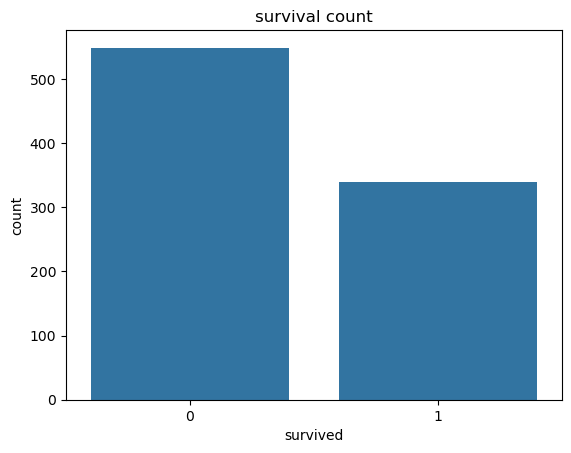

In [35]:
sns.countplot(x='survived',data=df)
plt.title('survival count')
plt.show()

In [57]:
df['Pclass']=df['class'].astype(str)
df['Pclass']=df['class'].map({'First':1,'Second':2,'Third':3})


In [58]:
df['class']=df['class'].map({'First':1,'Second':2,'Third':3})

In [59]:
df['class']=pd.Categorical(df['class']).codes

In [60]:
df=pd.get_dummies(df,columns=['class'])

In [65]:
print(df['embarked'].unique())

['S' 'C' 'Q']


In [68]:
df['embarked']=df['embarked'].map({'S':1,'C':2,'Q':3})	

In [70]:
df['embarked']=pd.to_numeric(df['embarked'],errors='coerce')		

In [71]:
df.dropna(subset=['embarked'],inplace=True)

In [72]:
print(df.dtypes)
print(df.head())

survived          int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked        float64
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
Pclass         category
pclass_1           bool
pclass_2           bool
pclass_3           bool
class_0            bool
class_1            bool
class_2            bool
dtype: object
Empty DataFrame
Columns: [survived, sex, age, sibsp, parch, fare, embarked, who, adult_male, deck, embark_town, alive, alone, Pclass, pclass_1, pclass_2, pclass_3, class_0, class_1, class_2]
Index: []


C:\Users\A C E R\OneDrive\anaconda\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\A C E R\OneDrive\anaconda\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


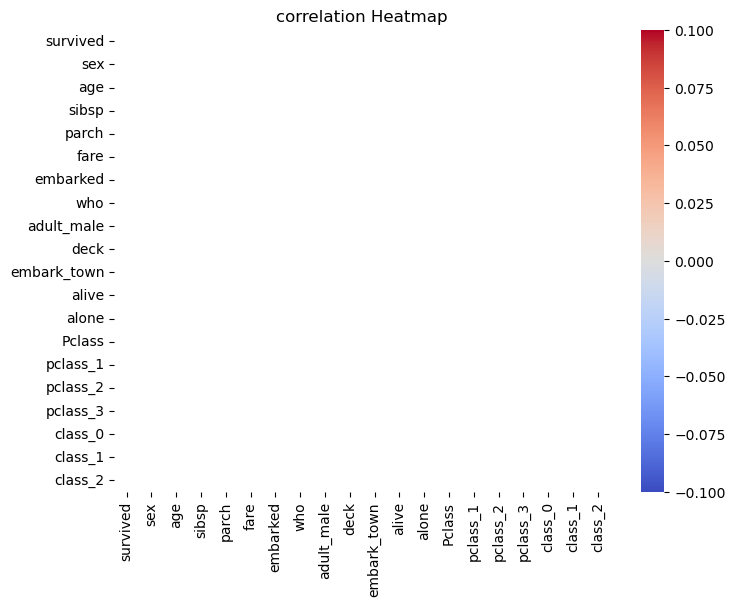

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation Heatmap")
plt.show()